# Winter 2021 Data Science Intern Challenge

Submitted by: Manjit Ullal

Email: ullal.m@northeastern.edu

#### **Question 1:** Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

2. What metric would you report for this dataset?

3. What is its value?

Answer: Please see below

In [ ]:
#@title
import requests
import pandas as pd
import io

url = 'https://raw.githubusercontent.com/manjitullal/DataChallenge/master/2019WDDataSet.csv'
urlData = requests.get(url).content
SneakerData = pd.read_csv(io.StringIO(urlData.decode('utf-8')))

In [ ]:
#@title
m = SneakerData.shape[0]
print(f'There are {m} orders')

There are 5000 orders


##### **1. Analysis**

In [ ]:
SneakerData.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
SneakerData.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [ ]:
import numpy as np
np.mean(SneakerData.order_amount)

3145.128

We can see that the AOV is shown as **3145.13**, which is the average order amount of all the orders across all the shops. Now we infer that this a big amount which we do not expect and therefore we are missing something with our initial analysis

Lets redo our analysis by checking what is the AOV of each shop

In [ ]:
#@title
average_order_amounts = SneakerData.groupby(['shop_id'])['order_amount'].mean()
average_order_amounts.head(10)

shop_id
1     308.818182
2     174.327273
3     305.250000
4     258.509804
5     290.311111
6     383.508475
7     218.000000
8     241.043478
9     234.000000
10    332.301887
Name: order_amount, dtype: float64

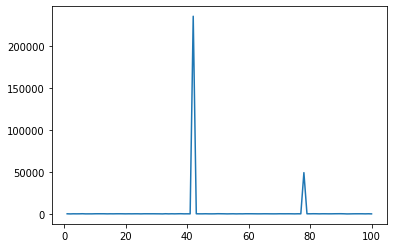

In [ ]:
#@title
import matplotlib.pyplot as plt
plt.plot(average_order_amounts)

# This indicates that there are few shops with very large AOV and this will impact the over all AOV

Here, We notice that the AOV of each shop is between 300 - 400$, which is quite low compared to **3145.13**

We notice that few shops have very high AOV, which are the outliers that are increasing the AOV

In [ ]:
#@title
average_order_amounts[average_order_amounts > 3145]

shop_id
42    235101.490196
78     49213.043478
Name: order_amount, dtype: float64

##### **2. Remodeling**

We have two ways to proceed now.

1. Find AOV excluding shop 42 and 78

2. Find AOV including shop 42 and 78


*1. Finding AOV excluding shop 42 and 78*

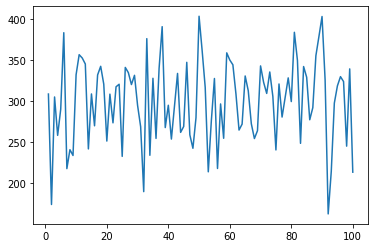

In [ ]:
average_order_amounts_adjusted = average_order_amounts[average_order_amounts < 3145]
plt.plot(average_order_amounts_adjusted)

In [ ]:
#@title
SneakerData2 = SneakerData[SneakerData.shop_id != 42]
SneakerData2 = SneakerData2[SneakerData.shop_id != 78]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#@title
SneakerData2.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,2499.584540,49.900877,849.858862,300.155823,1.995717
std,1444.221163,29.154367,86.887947,155.941112,0.982602
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1246.500000,24.000000,776.000000,163.000000,1.000000
50%,2499.000000,50.000000,850.000000,284.000000,2.000000
75%,3750.500000,74.000000,925.000000,386.500000,3.000000
max,5000.000000,100.000000,999.000000,1086.000000,8.000000


In [ ]:
#@title
Sum_order_item1 = SneakerData2.groupby(['shop_id'])['order_amount','total_items'].sum()
np.sum(Sum_order_item1.order_amount)/np.sum(Sum_order_item1.total_items)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


150.4

In [ ]:
#@title
Sum_order_item2 = SneakerData.groupby(['shop_id'])['order_amount','total_items'].sum()
np.sum(Sum_order_item2.order_amount)/np.sum(Sum_order_item2.total_items)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


357.92152221412965

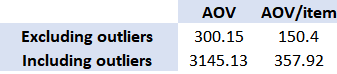

##### **Now, lets answer below questions:**

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

  Answer: In our data there a few shops selling a lot more sneakers than others, hence AOV is not the right metric to understand the average order value. Shop 42 and 78, could be a distributer and therefore are selling lot of sneakers of all price ranges, making them outliers in our dataset.
  

2. What metric would you report for this dataset?

  Answer: Better metric would be to use AOV/item. We can see in the image above. There are two ways to caluclate the AOV/item, one way is to remove the outliers and second way to calculate it, including the outliers.


3. What is its value?

  Answer: AOV/item is 150.4 excluding the outliers and 300.15 including the outliers.

#### **Question 2:** For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

1. How many orders were shipped by Speedy Express in total? 

  **Answer:** 54

  **Query:** 
  
  SELECT count(*) FROM Orders o, Shippers s where o.ShipperID = s.ShipperID and s.ShipperName = 'Speedy Express';


2.  What is the last name of the employee with the most orders?

  **Answer:** Handel

  **Query:** 
  
  SELECT  substr(CustomerName, 6, 12) AS LastName
FROM (SELECT CustomerName, MAX(ordercount) 
FROM (SELECT o.*,c.CustomerName, count(o.CustomerID) ordercount 
FROM Customers c, Orders o 
where o.CustomerID = c.CustomerID group by o.CustomerID));


3. What product was ordered the most by customers in Germany?

  **Answer:** Gorgonzola Telino

  **Query:**

  SELECT Country, ProductName, max(ordercount) 
FROM(
SELECT c.Country, p.ProductName, count(p.ProductName) ordercount
FROM Customers c, Orders o , OrderDetails d, Products p
where c.CustomerID = o.CustomerID and o.OrderID = d.OrderID and c.Country = 'Germany' and d.ProductID = p.ProductID
group by c.Country, d.ProductID);
